# Selective Withdrawal Phenomena and Entrainment

Here we'll study the critical moment when the withdrawal Phenomena transitions from selective to entrainment.

In [1]:
import myload01 as ml01

folder_path = 'C:\\Users\\sabbi\\Dropbox\\Darryl James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\input'
ml01.disp_files_folder(folder_path)


 Files in the folders are: 

C:\Users\sabbi\Dropbox\Darryl James\Mendeley_library\JetEntrainment\Selective\Qualifying_docs\SW_Python\input\cohen.csv
C:\Users\sabbi\Dropbox\Darryl James\Mendeley_library\JetEntrainment\Selective\Qualifying_docs\SW_Python\input\single.csv
C:\Users\sabbi\Dropbox\Darryl James\Mendeley_library\JetEntrainment\Selective\Qualifying_docs\SW_Python\input\utube.csv




In [2]:
file_name = 'C:\\Users\\sabbi\\Dropbox\\Darryl James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\input\\single.csv' 
data_single = ml01.load_csv(file_name)

file_name = 'C:\\Users\\sabbi\\Dropbox\\Darryl James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\input\\utube.csv' 
data_utube = ml01.load_csv(file_name)

file_name = 'C:\\Users\\sabbi\\Dropbox\\Darryl James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\input\\cohen.csv' 
data_cohen = ml01.load_csv(file_name)

import expdataproc as eprc 

data_single = eprc.proc_single(data_single)
data_utube = eprc.proc_utube(data_utube)
data_cohen = eprc.proc_cohen(data_cohen)

data_single.head(2)
data_utube.head(2)
#data_cohen.head(2)


,fluids,upper_rho,upper_nu,lower_rho,lower_nu,gamma,dia,Q,S,g_reduced,...,S_d,S_lc,nu_ratio,rho_ratio,V_tube,Re_lc,Fr_lc,Fr_dia,We_lc,We_lc_1_5
0,4,918,0.000005,1245,0.000002,0.038,0.010795,0.000150,0.015062,2.576602,...,1.395294,4.376279,0.737349,2.538071,1.641130,2251.905001,13.687290,7.728547,187.341900,2.847915
1,4,918,0.000005,1245,0.000002,0.038,0.010795,0.000261,0.017450,2.576602,...,1.616471,5.069989,0.737349,2.538071,2.851256,3912.400608,23.779938,13.427374,565.485436,3.552093


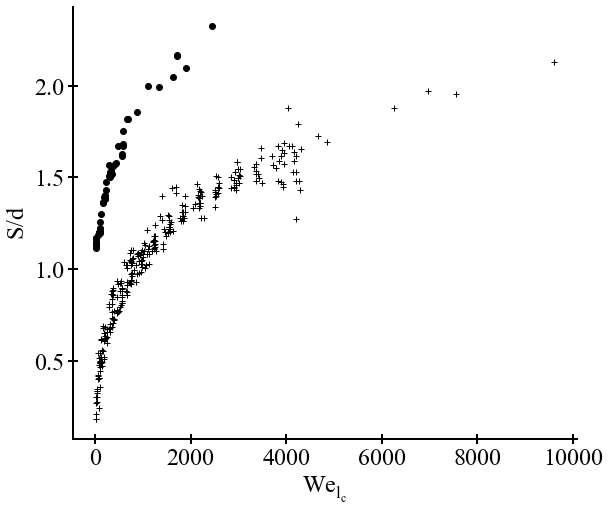

In [3]:
%matplotlib inline 
import swplot as swp

xscale_label = "linear"
yscale_label = "linear"
groupvar = "fluids"
xvar = "We_lc"
yvar = "S_d"
xlabel_name = "$\mathregular{We_{l_c}}$"
ylabel_name = "$\mathregular{S/d}$"
save_location = "C:\\Users\\sabbi\\Dropbox\\Darryl James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\output\\S_dvsWe.png"

h = swp.disp_figure01(xscale_label, yscale_label, groupvar, xvar, yvar, xlabel_name, ylabel_name, data_single, data_utube, save_location)


In [4]:
from scipy.optimize import curve_fit
import numpy as np

# First we do the curve fitting:

# Fitting function
def func(x, a, b):
    # return a * np.exp(b * x)
    return a * x + b

# Initial guess for curve fitting
#initial = [1,1] #by default

# Perform curve fit
ppars1, pcov1 = curve_fit(func,data_single['We_lc_1_5'],data_single['S_d'])
ppars2, pcov2 = curve_fit(func,data_utube['We_lc_1_5'],data_utube['S_d'])


# X-values for the fitted function
xFit = np.linspace(start=0, stop=7, num=100)


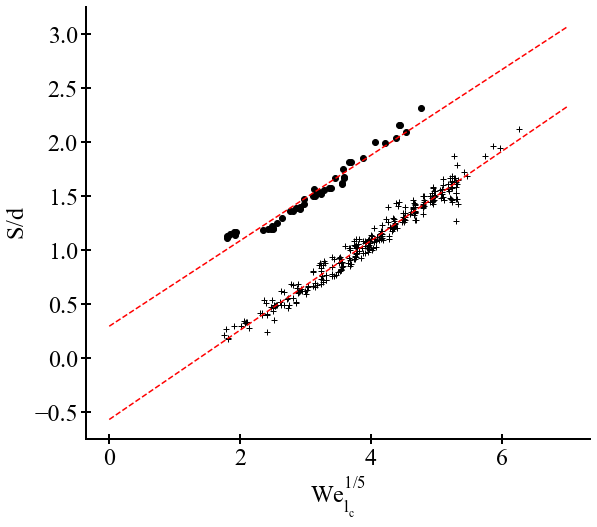

In [5]:
%matplotlib inline 
import swplot as swp

xscale_label = "linear"
yscale_label = "linear"
groupvar = "fluids"
xvar = "We_lc_1_5"
yvar = "S_d"
xlabel_name = "$\mathregular{We_{l_c}^{1/5}}$"
ylabel_name = "$\mathregular{S/d}$"
save_location = "C:\\Users\\sabbi\\Dropbox\\Darryl James\\Mendeley_library\\JetEntrainment\\Selective\\Qualifying_docs\\SW_Python\\output\\S_dvsWe_fittted.png"

h = swp.disp_figure_fit(xscale_label, yscale_label, groupvar, xvar, yvar, xlabel_name, ylabel_name, data_single, data_utube, xFit, ppars1, ppars2, save_location)

